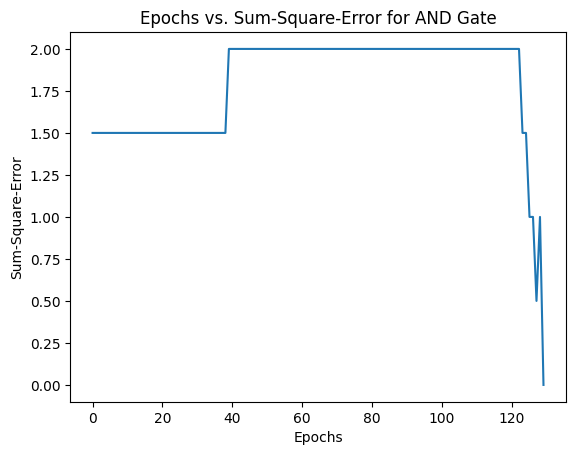

Trained Weights:
W0 = -0.10000000000000765
W1 = 0.1000000000000001
W2 = 0.05000000000000032


In [ ]:
#A1
import numpy as np
import matplotlib.pyplot as plt

# AND gate inputs and outputs as an numpy array
data = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [1, 0, 0],
    [1, 1, 1]
])

# The Initial weaights given the question
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# Activation function (Step function)
def step_function(x):
    return 0 if x <= 0 else 1

# Calculate the output of the perceptron
def predict(A, B):
    return step_function(W0 + W1 * A + W2 * B)

# Calculate sum-square-error for a given set of weights
def calculate_error(weights):
    errors = 0
    for example in data:
        A, B, Z = example
        predicted_Z = step_function(weights[0] + weights[1] * A + weights[2] * B)
        errors += (Z - predicted_Z) ** 2
    return errors / 2  # Dividing by 2 for convenience in the update rule

# Train the perceptron using the provided data
epochs = 0
max_epochs = 1000
error_threshold = 0.002
errors = []

while True:
    current_error = calculate_error([W0, W1, W2])
    errors.append(current_error)

    if current_error <= error_threshold or epochs >= max_epochs:
        break

    for example in data:
        A, B, Z = example
        predicted_Z = predict(A, B)
        error = Z - predicted_Z

        # Update weights using the perceptron learning rule
        W0 += learning_rate * error
        W1 += learning_rate * error * A
        W2 += learning_rate * error * B

    epochs += 1

# Plotting epochs against sum-square-error
plt.plot(range(epochs+1), errors)  # Add 1 to match the length of errors with epochs
plt.xlabel('Epochs')
plt.ylabel('Sum-Square-Error')
plt.title('Epochs vs. Sum-Square-Error for AND Gate')
plt.show()

# Displaying the trained weights
print("Trained Weights:")
print("W0 =", W0)
print("W1 =", W1)
print("W2 =", W2)


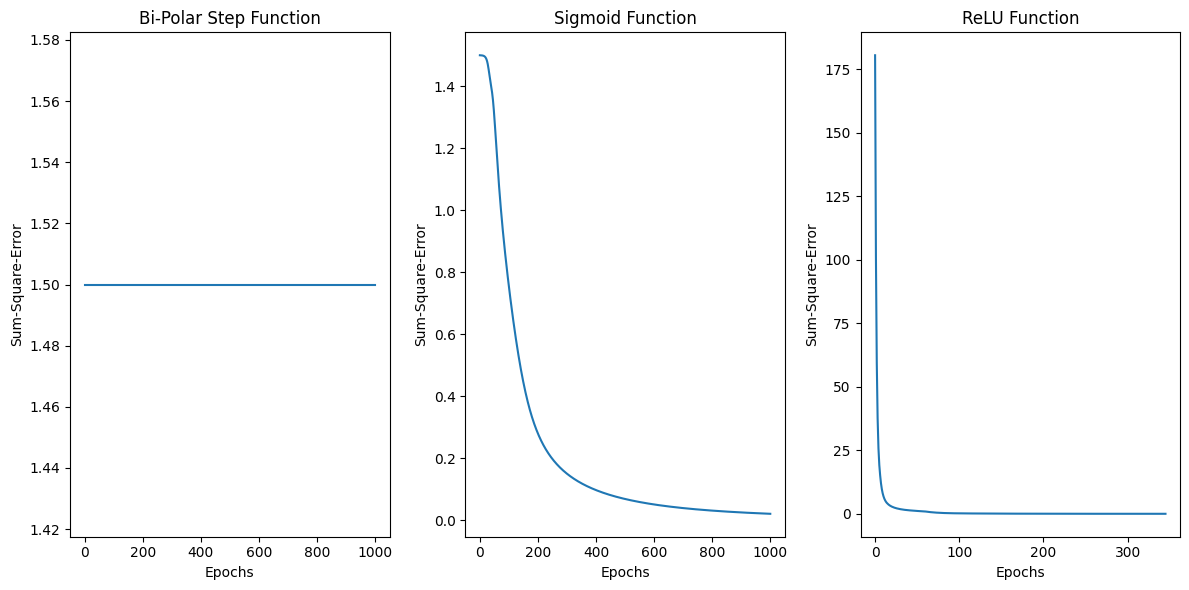

Iterations taken to converge:
Bi-Polar Step Function: 1000
Sigmoid Function: 1000
ReLU Function: 345


In [ ]:
#A2
import numpy as np
import matplotlib.pyplot as plt

# The AND gate Inputs and outputs
data = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [1, 0, 0],
    [1, 1, 1]
])

# The given initial weights
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# Activation functions  which are asked
def bipolar_step_function(x):
    return 1 if x > 0 else 0 if x == 0 else -1

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

def relu_function(x):
    return max(0, x)

# Calculating the output of the perceptron with the activation function
def predict(A, B, activation_function):
    return activation_function(W0 + W1 * A + W2 * B)

# Calculate sum-square-error for the activation function
def calculate_error(weights, activation_function):
    errors = 0
    for example in data:
        A, B, Z = example
        predicted_Z = activation_function(weights[0] + weights[1] * A + weights[2] * B)
        errors += (Z - predicted_Z) ** 2
    return errors / 2

# Train the perceptron using the provided data and activation function
def train_perceptron(activation_function):
    global W0, W1, W2
    epochs = 0
    max_epochs = 1000
    error_threshold = 0.002
    errors = []

    while True:
        current_error = calculate_error([W0, W1, W2], activation_function)
        errors.append(current_error)

        if current_error <= error_threshold or epochs >= max_epochs:
            break

        for example in data:
            A, B, Z = example
            predicted_Z = predict(A, B, activation_function)
            error = Z - predicted_Z

            # Updating the weights using the perceptron learning rule
            W0 += learning_rate * error
            W1 += learning_rate * error * A
            W2 += learning_rate * error * B

        epochs += 1

    return epochs, errors

# Train with Bi-Polar Step function
W0, W1, W2 = 10, 0.2, -0.75
epochs_bipolar, errors_bipolar = train_perceptron(bipolar_step_function)

# Train with Sigmoid function
W0, W1, W2 = 10, 0.2, -0.75
epochs_sigmoid, errors_sigmoid = train_perceptron(sigmoid_function)

# Train with ReLU function
W0, W1, W2 = 10, 0.2, -0.75
epochs_relu, errors_relu = train_perceptron(relu_function)

# Plotting epochs against sum-square-error for each activation function
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(range(epochs_bipolar + 1), errors_bipolar)
plt.title('Bi-Polar Step Function')
plt.xlabel('Epochs')
plt.ylabel('Sum-Square-Error')

plt.subplot(1, 3, 2)
plt.plot(range(epochs_sigmoid + 1), errors_sigmoid)
plt.title('Sigmoid Function')
plt.xlabel('Epochs')
plt.ylabel('Sum-Square-Error')

plt.subplot(1, 3, 3)
plt.plot(range(epochs_relu + 1), errors_relu)
plt.title('ReLU Function')
plt.xlabel('Epochs')
plt.ylabel('Sum-Square-Error')

plt.tight_layout()
plt.show()

# Display the number of iterations taken to converge for each activation function
print("Iterations taken to converge:")
print("Bi-Polar Step Function:", epochs_bipolar)
print("Sigmoid Function:", epochs_sigmoid)
print("ReLU Function:", epochs_relu)


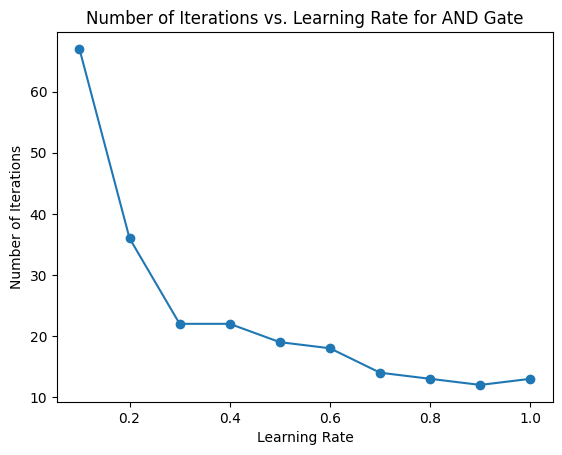

In [ ]:
#A3
import numpy as np
import matplotlib.pyplot as plt

# Given data for AND gate
data = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [1, 0, 0],
    [1, 1, 1]
])

W0 = 10
W1 = 0.2
W2 = -0.75

# Activation function (Step function)
def step_function(x):
    return 0 if x <= 0 else 1

# Calculating the output of the perceptron
def predict(A, B):
    return step_function(W0 + W1 * A + W2 * B)

# Calculating the sum-square-error
def calculate_error(weights):
    errors = 0
    for example in data:
        A, B, Z = example
        predicted_Z = step_function(weights[0] + weights[1] * A + weights[2] * B)
        errors += (Z - predicted_Z) ** 2
    return errors / 2

# Training the perceptron using the provided data and learning rate
def train_perceptron(learning_rate):
    global W0, W1, W2
    epochs = 0
    max_epochs = 1000
    error_threshold = 0.002

    while True:
        current_error = calculate_error([W0, W1, W2])

        if current_error <= error_threshold or epochs >= max_epochs:
            break

        for example in data:
            A, B, Z = example
            predicted_Z = predict(A, B)
            error = Z - predicted_Z

            W0 += learning_rate * error
            W1 += learning_rate * error * A
            W2 += learning_rate * error * B

        epochs += 1

    return epochs

# Vary the learning rates
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
iterations = []

# Train the perceptron for each learning rate
for rate in learning_rates:
    W0, W1, W2 = 10, 0.2, -0.75  # Reset weights
    iterations.append(train_perceptron(rate))

# Plotting the number of iterations against learning rates
plt.plot(learning_rates, iterations, marker='o', linestyle='-')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations')
plt.title('Number of Iterations vs. Learning Rate for AND Gate')
plt.show()


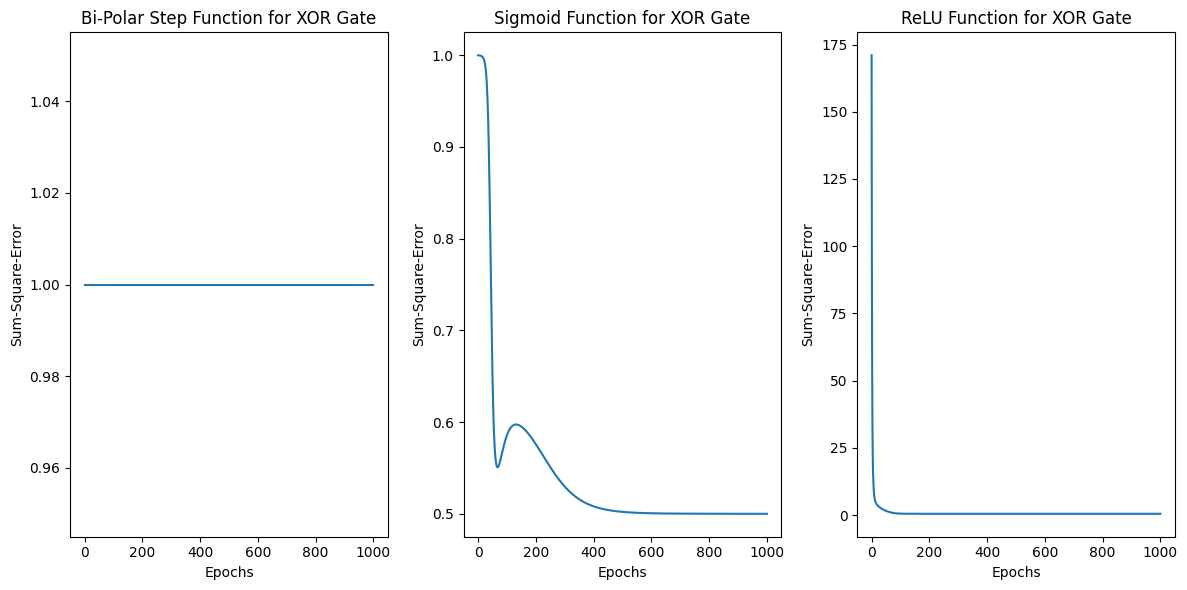

Trained Weights for XOR Gate:
W0 = 0.526315789473727
W1 = -0.052631578947401975
W2 = -0.02631578947371866


In [ ]:
#A4
import numpy as np
import matplotlib.pyplot as plt

# Given data for XOR gate
data_xor = np.array([
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
])

W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# Activation functions asked
def bipolar_step_function(x):
    return 1 if x > 0 else 0 if x == 0 else -1

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

def relu_function(x):
    return max(0, x)

# Calculate the output of the perceptron with the specified activation function
def predict(A, B, activation_function):
    return activation_function(W0 + W1 * A + W2 * B)

# Calculate sum-square-error for a given set of weights and activation function
def calculate_error(weights, activation_function, data):
    errors = 0
    for example in data:
        A, B, Z = example
        predicted_Z = activation_function(weights[0] + weights[1] * A + weights[2] * B)
        errors += (Z - predicted_Z) ** 2
    return errors / 2

# Train the perceptron using the provided data and activation function
def train_perceptron(data, activation_function):
    global W0, W1, W2
    epochs = 0
    max_epochs = 1000
    error_threshold = 0.002
    errors = []

    while True:
        current_error = calculate_error([W0, W1, W2], activation_function, data)
        errors.append(current_error)

        if current_error <= error_threshold or epochs >= max_epochs:
            break

        for example in data:
            A, B, Z = example
            predicted_Z = predict(A, B, activation_function)
            error = Z - predicted_Z

            # Update weights using the perceptron learning rule
            W0 += learning_rate * error
            W1 += learning_rate * error * A
            W2 += learning_rate * error * B

        epochs += 1

    return epochs, errors

# Training with Bi-Polar Step function for XOR gate
W0, W1, W2 = 10, 0.2, -0.75
epochs_bipolar, errors_bipolar = train_perceptron(data_xor, bipolar_step_function)

# Training with Sigmoid function for XOR gate
W0, W1, W2 = 10, 0.2, -0.75
epochs_sigmoid, errors_sigmoid = train_perceptron(data_xor, sigmoid_function)

# Training with ReLU function for XOR gate
W0, W1, W2 = 10, 0.2, -0.75
epochs_relu, errors_relu = train_perceptron(data_xor, relu_function)

# Plotting epochs against sum-square-error for each activation function for XOR gate
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(range(epochs_bipolar + 1), errors_bipolar)
plt.title('Bi-Polar Step Function for XOR Gate')
plt.xlabel('Epochs')
plt.ylabel('Sum-Square-Error')

plt.subplot(1, 3, 2)
plt.plot(range(epochs_sigmoid + 1), errors_sigmoid)
plt.title('Sigmoid Function for XOR Gate')
plt.xlabel('Epochs')
plt.ylabel('Sum-Square-Error')

plt.subplot(1, 3, 3)
plt.plot(range(epochs_relu + 1), errors_relu)
plt.title('ReLU Function for XOR Gate')
plt.xlabel('Epochs')
plt.ylabel('Sum-Square-Error')

plt.tight_layout()
plt.show()

# Display the trained weights for XOR gate
print("Trained Weights for XOR Gate:")
print("W0 =", W0)
print("W1 =", W1)
print("W2 =", W2)


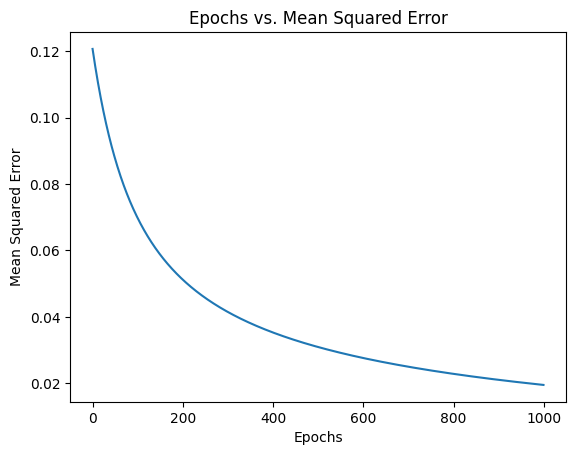

Trained Weights:
Candies Weight: -0.342969871106559
Mangoes Weight: 2.35205372031954
Milk Packets Weight: 0.10430710326849751
Payment Weight: 1.9500714984252074

Predicted Values:
  Customer  Actual_High_Value_Tx  Predicted_High_Value_Tx
0      C_1                     1                        1
1      C_2                     1                        1
2      C_3                     1                        1
3      C_4                     0                        0
4      C_5                     1                        1
5      C_6                     0                        0
6      C_7                     1                        1
7      C_8                     1                        1
8      C_9                     0                        0
9     C_10                     0                        0


In [ ]:
#A5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# The given Customer data
data_customer = pd.DataFrame({
    'Customer': ['C_1', 'C_2', 'C_3', 'C_4', 'C_5', 'C_6', 'C_7', 'C_8', 'C_9', 'C_10'],
    'Candies': [20, 16, 27, 19, 24, 22, 15, 18, 21, 16],
    'Mangoes': [6, 3, 6, 1, 4, 1, 4, 4, 1, 2],
    'Milk_Packets': [2, 6, 2, 2, 2, 5, 2, 2, 4, 4],
    'Payment': [386, 289, 393, 110, 280, 167, 271, 274, 148, 198],
    'High_Value_Tx': ['Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No']
})

# Normalizing the features
data_customer[['Candies', 'Mangoes', 'Milk_Packets', 'Payment']] = (
    data_customer[['Candies', 'Mangoes', 'Milk_Packets', 'Payment']] - data_customer[['Candies', 'Mangoes', 'Milk_Packets', 'Payment']].mean()
) / data_customer[['Candies', 'Mangoes', 'Milk_Packets', 'Payment']].std()

# Extract all the features and labels
X = data_customer[['Candies', 'Mangoes', 'Milk_Packets', 'Payment']].values
y = (data_customer['High_Value_Tx'] == 'Yes').astype(int).values

# Initialize weights and learning rate
np.random.seed(42)
weights = np.random.rand(X.shape[1])
learning_rate = 0.01

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Train the perceptron using gradient descent
epochs = 1000
errors = []

for epoch in range(epochs):
    # Forward pass
    predictions = sigmoid(np.dot(X, weights))

    # Compute error
    error = np.mean((predictions - y) ** 2)
    errors.append(error)

    # Backward pass
    gradient = np.dot(X.T, (predictions - y) * sigmoid_derivative(predictions))
    weights -= learning_rate * gradient

# Plotting epochs against error values
plt.plot(range(epochs), errors)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Epochs vs. Mean Squared Error')
plt.show()

# Display the trained weights
print("Trained Weights:")
print("Candies Weight:", weights[0])
print("Mangoes Weight:", weights[1])
print("Milk Packets Weight:", weights[2])
print("Payment Weight:", weights[3])

# Predicting the values using the trained perceptron
predicted_values = sigmoid(np.dot(X, weights))
predicted_labels = (predicted_values >= 0.5).astype(int)

# Displays the predicted values
predicted_df = pd.DataFrame({
    'Customer': data_customer['Customer'],
    'Actual_High_Value_Tx': y,
    'Predicted_High_Value_Tx': predicted_labels
})
print("\nPredicted Values:")
print(predicted_df)


In [ ]:
#A6
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# The same Customer data as in A5
data_customer = pd.DataFrame({
    'Customer': ['C_1', 'C_2', 'C_3', 'C_4', 'C_5', 'C_6', 'C_7', 'C_8', 'C_9', 'C_10'],
    'Candies': [20, 16, 27, 19, 24, 22, 15, 18, 21, 16],
    'Mangoes': [6, 3, 6, 1, 4, 1, 4, 4, 1, 2],
    'Milk_Packets': [2, 6, 2, 2, 2, 5, 2, 2, 4, 4],
    'Payment': [386, 289, 393, 110, 280, 167, 271, 274, 148, 198],
    'High_Value_Tx': ['Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No']
})

# Normalizing the features
data_customer[['Candies', 'Mangoes', 'Milk_Packets', 'Payment']] = (
    data_customer[['Candies', 'Mangoes', 'Milk_Packets', 'Payment']] - data_customer[['Candies', 'Mangoes', 'Milk_Packets', 'Payment']].mean()
) / data_customer[['Candies', 'Mangoes', 'Milk_Packets', 'Payment']].std()

# Extract all the features and labels
X = data_customer[['Candies', 'Mangoes', 'Milk_Packets', 'Payment']].values
y = (data_customer['High_Value_Tx'] == 'Yes').astype(int).values

# Calculating pseudo inverse using the numpy Pseudo-inverse in built method
pseudo_inverse_weights = np.linalg.pinv(X.T @ X) @ X.T @ y

# Display the weights obtained from perceptron learning
print("Weights from Perceptron Learning:")
print("Candies Weight:", weights[0])
print("Mangoes Weight:", weights[1])
print("Milk Packets Weight:", weights[2])
print("Payment Weight:", weights[3])

# Display the weights obtained from the matrix pseudo-inverse
print("\nWeights from Matrix Pseudo-Inverse:")
print("Candies Weight:", pseudo_inverse_weights[0])
print("Mangoes Weight:", pseudo_inverse_weights[1])
print("Milk Packets Weight:", pseudo_inverse_weights[2])
print("Payment Weight:", pseudo_inverse_weights[3])

# Predict values using the trained perceptron
predicted_values_perceptron = sigmoid(np.dot(X, weights))
predicted_labels_perceptron = (predicted_values_perceptron >= 0.5).astype(int)

# Predict values using the matrix pseudo-inverse
predicted_values_pseudo_inverse = sigmoid(np.dot(X, pseudo_inverse_weights))
predicted_labels_pseudo_inverse = (predicted_values_pseudo_inverse >= 0.5).astype(int)

# Display the predicted values
predicted_df_perceptron = pd.DataFrame({
    'Customer': data_customer['Customer'],
    'Actual_High_Value_Tx': y,
    'Predicted_High_Value_Tx_Perceptron': predicted_labels_perceptron
})

predicted_df_pseudo_inverse = pd.DataFrame({
    'Customer': data_customer['Customer'],
    'Actual_High_Value_Tx': y,
    'Predicted_High_Value_Tx_Pseudo_Inverse': predicted_labels_pseudo_inverse
})

print("\nPredicted Values - Perceptron Learning:")
print(predicted_df_perceptron)

print("\nPredicted Values - Matrix Pseudo-Inverse:")
print(predicted_df_pseudo_inverse)


Weights from Perceptron Learning:
Candies Weight: -0.342969871106559
Mangoes Weight: 2.35205372031954
Milk Packets Weight: 0.10430710326849751
Payment Weight: 1.9500714984252074

Weights from Matrix Pseudo-Inverse:
Candies Weight: -0.0994728056635295
Mangoes Weight: 0.2288793873144806
Milk Packets Weight: -0.014153994818394328
Payment Weight: 0.2468354232952621

Predicted Values - Perceptron Learning:
  Customer  Actual_High_Value_Tx  Predicted_High_Value_Tx_Perceptron
0      C_1                     1                                   1
1      C_2                     1                                   1
2      C_3                     1                                   1
3      C_4                     0                                   0
4      C_5                     1                                   1
5      C_6                     0                                   0
6      C_7                     1                                   1
7      C_8                     1           

In [ ]:
#A7
import numpy as np

# Given AND gate data
data_and = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [1, 0, 0],
    [1, 1, 1]
])

# Initial weights and learning rate
np.random.seed(42)
alpha = 0.05

# Initialize weights and biases
v = np.random.rand(2, 2)
w = np.random.rand(2, 1)

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Forward pass through the network
def forward_pass(inputs):
    # Input layer to hidden layer
    h_input = np.dot(inputs, v)
    h_output = sigmoid(h_input)

    # Hidden layer to output layer
    o_input = np.dot(h_output, w)
    o_output = sigmoid(o_input)

    return h_output, o_output

# Backward pass and weight updates
def backward_pass(inputs, h_output, o_output, target):
    global w, v  # Declare w and v as global variables
    # Compute error
    error = target - o_output

    # Backpropagation
    delta_o = error * sigmoid_derivative(o_output)
    delta_h = delta_o.dot(w.T) * sigmoid_derivative(h_output)

    # Update weights
    w += alpha * h_output.T.dot(delta_o)
    v += alpha * inputs.T.dot(delta_h)

    return error

# Train the neural network
epochs = 1000
errors = []

for epoch in range(epochs):
    total_error = 0
    for example in data_and:
        A, B, Z = example
        inputs = np.array([[A, B]])
        target = np.array([[Z]])

        # Perform forward and backward pass for each example
        h_output, o_output = forward_pass(inputs)
        total_error += backward_pass(inputs, h_output, o_output, target)

    # Calculate mean squared error for the epoch
    mean_squared_error = total_error / len(data_and)
    errors.append(mean_squared_error)

    # Check for convergence
    if mean_squared_error <= 0.002:
        print(f"Converged after {epoch + 1} epochs.")
        break

# Display the trained weights
print("Trained Weights:")
print("v:")
print(v)
print("w:")
print(w)

# Test the trained neural network on AND gate inputs
print("\nTest Predictions:")
for example in data_and:
    A, B, Z = example
    inputs = np.array([[A, B]])
    _, prediction = forward_pass(inputs)
    print(f"A={A}, B={B} -> Prediction={np.round(prediction[0])}")


Converged after 1 epochs.
Trained Weights:
v:
[[0.37448511 0.95066264]
 [0.73193768 0.59859507]]
w:
[[0.1486578 ]
 [0.14838162]]

Test Predictions:
A=0, B=0 -> Prediction=[1.]
A=0, B=1 -> Prediction=[1.]
A=1, B=0 -> Prediction=[1.]
A=1, B=1 -> Prediction=[1.]


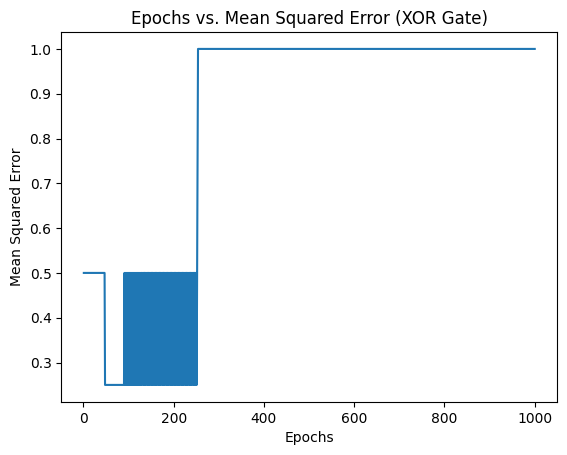

Trained Weights:
W0: 0.09999999999999236
W1: -0.09999999999999969
W2: -0.09999999999999969

Test Predictions:
A=0, B=0 -> Prediction=1
A=0, B=1 -> Prediction=0
A=1, B=0 -> Prediction=0
A=1, B=1 -> Prediction=0


In [ ]:
#A8
import numpy as np
import matplotlib.pyplot as plt

# XOR gate data
data_xor = np.array([
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
])

# Initial weights and learning rate
W0, W1, W2 = 10, 0.2, -0.75
learning_rate = 0.05

# Activation function (Step function)
def step_function(x):
    return 1 if x > 0 else 0

# Perceptron training
epochs = 1000
errors = []

for epoch in range(epochs):
    total_error = 0
    for example in data_xor:
        A, B, Z = example

        # Calculate the weighted sum
        weighted_sum = W0 + W1 * A + W2 * B

        # Apply the Step activation function
        predicted_output = step_function(weighted_sum)

        # Calculate error and update weights
        error = Z - predicted_output
        W0 += learning_rate * error
        W1 += learning_rate * error * A
        W2 += learning_rate * error * B

        total_error += error ** 2

    # Calculate mean squared error for the epoch
    mean_squared_error = total_error / len(data_xor)
    errors.append(mean_squared_error)

    # Check for convergence
    if mean_squared_error <= 0.002:
        print(f"Converged after {epoch + 1} epochs.")
        break

# Plotting epochs against mean squared error
plt.plot(range(1, epoch + 2), errors)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Epochs vs. Mean Squared Error (XOR Gate)')
plt.show()

# Display the trained weights
print("Trained Weights:")
print("W0:", W0)
print("W1:", W1)
print("W2:", W2)

# Test the trained perceptron on XOR gate inputs
print("\nTest Predictions:")
for example in data_xor:
    A, B, Z = example
    weighted_sum = W0 + W1 * A + W2 * B
    prediction = step_function(weighted_sum)
    print(f"A={A}, B={B} -> Prediction={prediction}")


Converged after 64 epochs.


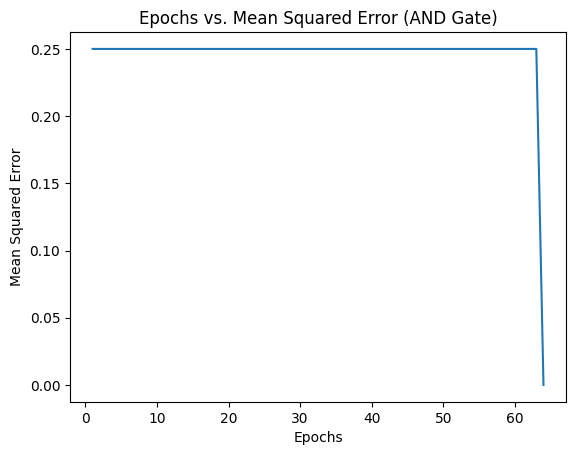

Trained Weights:
W0: 6.8499999999999766
W1: -2.9499999999999975
W2: -3.899999999999994

Test Predictions:
A=0, B=0 -> Prediction=1
A=0, B=1 -> Prediction=1
A=1, B=0 -> Prediction=1
A=1, B=1 -> Prediction=0


In [ ]:
#A9
import numpy as np
import matplotlib.pyplot as plt

# AND gate data
data_and = np.array([
    [0, 0, 1, 0],
    [0, 1, 1, 0],
    [1, 0, 1, 0],
    [1, 1, 0, 1]
])

# Initial weights and learning rate
W0, W1, W2 = 10, 0.2, -0.75
learning_rate = 0.05

# Activation function (Step function)
def step_function(x):
    return 1 if x > 0 else 0

# Neural network training
epochs = 1000
errors = []

for epoch in range(epochs):
    total_error = 0
    for example in data_and:
        A, B, Z1, Z2 = example

        # Forward pass
        H1_input = W0 + W1 * A + W2 * B
        H1_output = step_function(H1_input)

        # Update weights using the perceptron learning rule and learning rate
        W0 += learning_rate * (Z1 - H1_output)
        W1 += learning_rate * (Z1 - H1_output) * A
        W2 += learning_rate * (Z1 - H1_output) * B

        # Calculate error for the epoch
        total_error += (Z1 - H1_output) ** 2

    # Calculate mean squared error for the epoch
    mean_squared_error = total_error / len(data_and)
    errors.append(mean_squared_error)

    # Check for convergence
    if mean_squared_error <= 0.002:
        print(f"Converged after {epoch + 1} epochs.")
        break

# Plotting epochs against mean squared error
plt.plot(range(1, epoch + 2), errors)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Epochs vs. Mean Squared Error (AND Gate)')
plt.show()

# Display the trained weights
print("Trained Weights:")
print("W0:", W0)
print("W1:", W1)
print("W2:", W2)

# Test the trained perceptron on AND gate inputs
print("\nTest Predictions:")
for example in data_and:
    A, B, Z1, Z2 = example
    H1_input = W0 + W1 * A + W2 * B
    H1_output = step_function(H1_input)
    print(f"A={A}, B={B} -> Prediction={H1_output}")



Predicted Outputs for AND Gate:
Input: [0 0], Predicted: 0
Input: [0 1], Predicted: 0
Input: [1 0], Predicted: 0
Input: [1 1], Predicted: 1


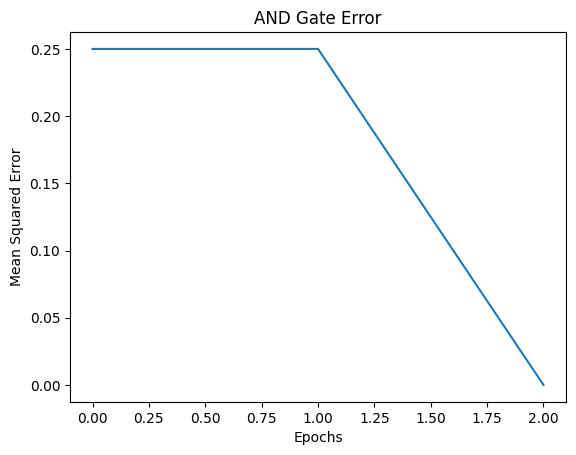


Predicted Outputs for XOR Gate:
Input: [0 0], Predicted: 0
Input: [0 1], Predicted: 1
Input: [1 0], Predicted: 1
Input: [1 1], Predicted: 0


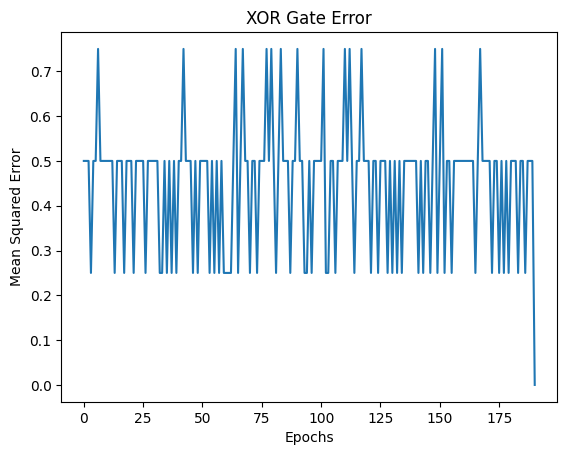

In [ ]:
#A10
import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Define functions for AND and XOR gates
def AND(x1, x2):
    return np.bitwise_and(x1, x2)

def XOR(x1, x2):
    return np.bitwise_xor(x1, x2)

# Generate data for the AND gate
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = AND(X_and[:, 0], X_and[:, 1])

# Generate data for the XOR gate
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = XOR(X_xor[:, 0], X_xor[:, 1])

# Define a function to train and plot errors
def train_and_plot(X, y, title):
    errors = []
    for epoch in range(1000):
        # Define and train the MLP classifier
        mlp = MLPClassifier(activation='relu', solver='lbfgs', hidden_layer_sizes=(4,), max_iter=1)
        mlp.fit(X, y)

        # Predict and calculate error
        y_pred = mlp.predict(X)
        error = np.mean((y - y_pred) ** 2)
        errors.append(error)

        # Stop if convergence criteria are met
        if error <= 0.002:
            break

    # Print predicted output
    print(f"\nPredicted Outputs for {title} Gate:")
    for i in range(len(X)):
        print(f"Input: {X[i]}, Predicted: {y_pred[i]}")

    # Plot epochs vs error
    plt.plot(range(len(errors)), errors)
    plt.xlabel("Epochs")
    plt.ylabel("Mean Squared Error")
    plt.title(f"{title} Gate Error")
    plt.show()

# Train and plot for the AND gate
train_and_plot(X_and, y_and, "AND")

# Train and plot for the XOR gate
train_and_plot(X_xor, y_xor, "XOR")


In [ ]:
#A11
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading our dataset
file_path = '/content/loan-train.csv'
df = pd.read_csv(file_path)

# Handle missing values (Dropping in this case)
df = df.dropna()

# Convert '3+' to a numeric value equivalent to 3 in the 'Dependents' column
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

# Encode the categorical variables
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Married'] = label_encoder.fit_transform(df['Married'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Self_Employed'] = label_encoder.fit_transform(df['Self_Employed'])
df['Property_Area'] = label_encoder.fit_transform(df['Property_Area'])
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])

# Select features (X) and target variable (y)
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the accuracy results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.71
Confusion Matrix:
[[ 0 28]
 [ 0 68]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.71      1.00      0.83        68

    accuracy                           0.71        96
   macro avg       0.35      0.50      0.41        96
weighted avg       0.50      0.71      0.59        96



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
